## Описание проекта

Вас пригласили на стажировку в отдел маркетинговой аналитики Яндекс.Афиши.

<b> Задача:</b> помочь маркетологам снизить расходы — отказаться от невыгодных источников трафика и перераспределить бюджет.

Есть данные Яндекс.Афиши с июня 2017 по конец мая 2018 года:
- лог сервера с данными о посещениях сайта Яндекс.Афиши,
- выгрузка всех заказов за этот период,
- статистика рекламных расходов.

Выручка измеряется в условных единицах — у.е.

## Просмотр и предобработка данных

In [507]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')

In [508]:
visits = pd.read_csv('/Users/alena/Desktop/projects/yandex_afisha/visits_log.csv')
orders = pd.read_csv('/Users/alena/Desktop/projects/yandex_afisha/orders_log.csv')
costs = pd.read_csv('/Users/alena/Desktop/projects/yandex_afisha/costs.csv')

### Таблица visits

- Uid — уникальный идентификатор пользователя,
- Device — категория устройства пользователя,
- Start Ts — дата и время начала сессии,
- End Ts — дата и время окончания сессии,
- Source Id — идентификатор источника перехода на сайт.

In [509]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [510]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [511]:
visits.duplicated().sum()

0

In [512]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


В таблице visits:
- приведем названия столбцов к нижнему регистру
- переименуем столбцы
- переведем даты в формат datetime

In [513]:
visits.columns = visits.columns.str.lower()

visits = visits.rename(
    columns={'end ts': 'end_ts',
    'source id': 'source_id',
    'start ts': 'start_ts'}
)

visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

### Таблица orders

- Uid — уникальный идентификатор пользователя,
- Buy Ts — дата и время заказа,
- Revenue — сумма заказа.

In [514]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [515]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [516]:
orders.duplicated().sum()

0

In [517]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


В таблице orders:
- приведем названия столбцов к нижнему регистру
- переименуем столбцы
- переведем дату в формат datetime

In [518]:
orders.columns = orders.columns.str.lower()

orders = orders.rename(
    columns={'buy ts': 'buy_ts',}
)

orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

### Таблица costs 

- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.

In [519]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [520]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [521]:
costs.duplicated().sum()

0

In [522]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [523]:
costs['dt'] = pd.to_datetime(costs['dt'])

<b> Вывод </b>

Таблица visits содержит столбцы:
- uid — уникальный идентификатор пользователя,
- device — категория устройства пользователя,
- start_ts — дата и время начала сессии,
- end_ts — дата и время окончания сессии,
- source_id — идентификатор источника перехода на сайт.

Таблица orders:
- uid — уникальный идентификатор пользователя,
- buy_ts — дата и время заказа,
- revenue — сумма заказа.

Таблица costs:
- source_id — идентификатор рекламного источника,
- dt — дата проведения рекламной кампании,
- costs — расходы на эту кампанию.

Дубликатов и пропусков не обнаружено.

## Продуктовые метрики

### Оценка пользовательской активности

Рассчитаем:
- DAU - кол-во уникальных пользователей в день
- WAU - кол-во уникальных пользователей в неделю
- MAU - кол-во уникальных пользователей в месяц

Выделим в отдельные столбцы год, месяц и неделю.

In [524]:
visits['session_year'] = visits['start_ts'].dt.year

visits['session_month'] = visits['start_ts'].astype('datetime64[M]')

visits['session_week'] = visits['start_ts'].astype('datetime64[W]')

visits['session_date'] = visits['start_ts'].dt.date

#### DAU

In [525]:
dau = visits.groupby(['session_date']).agg({'uid':'nunique'}).reset_index()

dau_mean = dau.mean().astype('int')
dau_mean

uid    907
dtype: int64

In [526]:
dau = visits.groupby(['session_date']).agg({'uid':'nunique'})
dau = dau.reset_index()

dau.head()

,session_date,uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


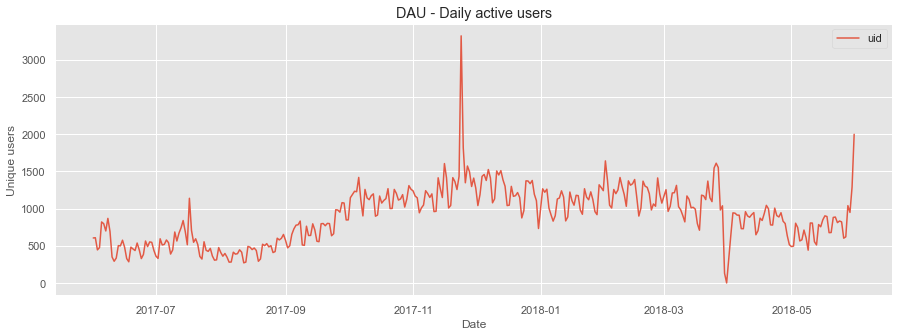

In [527]:
dau.plot(y='uid', x='session_date', alpha=0.9, figsize=(15,5))

plt.title('DAU - Daily active users')
plt.xlabel('Date')
plt.ylabel('Unique users')
plt.show()

#### WAU

In [528]:
wau = (visits.groupby(['session_year', 'session_week'])
.agg({'uid':'nunique'}).reset_index()
      )

wau_mean = wau.mean().astype('int')
wau_mean

<ipython-input-528-ff889e26e805>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  wau_mean = wau.mean().astype('int')


session_year    2017
uid             5621
dtype: int64

In [529]:
wau.head()

,session_year,session_week,uid
0,2017,2017-06-01,4082
1,2017,2017-06-08,3311
2,2017,2017-06-15,2844
3,2017,2017-06-22,3079
4,2017,2017-06-29,3055


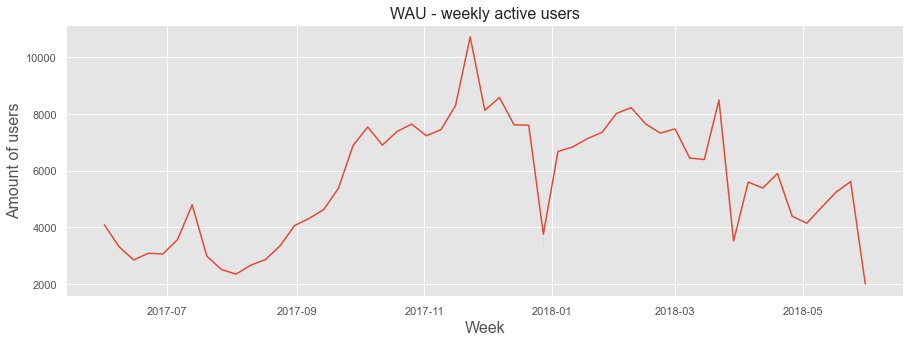

In [530]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='session_week', y='uid', data=wau)

plt.xlabel('Week',fontsize=16)
plt.ylabel('Amount of users',fontsize=16)
plt.title('WAU - weekly active users', fontsize=16)
plt.show()

#### MAU

In [531]:
mau = (visits.groupby(['session_year', 'session_month'])
.agg({'uid':'nunique'})
      )
mau_mean = mau.mean()
mau_mean

uid    23228.416667
dtype: float64

In [532]:
mau = mau.reset_index()
mau.head()

,session_year,session_month,uid
0,2017,2017-06-01,13259
1,2017,2017-07-01,14183
2,2017,2017-08-01,11631
3,2017,2017-09-01,18975
4,2017,2017-10-01,29692


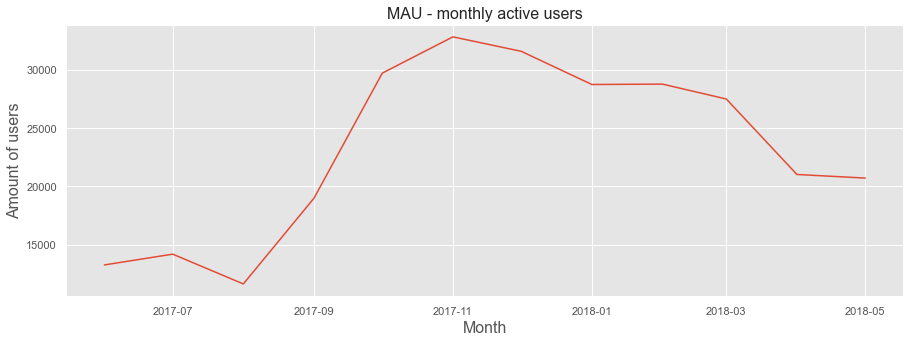

In [533]:
plt.figure(figsize=(15, 5))
sns.lineplot(x='session_month', y='uid', data=mau)


plt.xlabel('Month',fontsize=16)
plt.ylabel('Amount of users',fontsize=16)
plt.title('MAU - monthly active users', fontsize=16)
plt.show()

<b> Вывод </b>

Количество пользователей в день значительно не изменяется.
Бывают резки всплески - например, перед Новым годом.

В 2018 году наблюдается спад недельной и месячной активности - пользователи меньше пользуются сервисом.

### Посещения сайта

Определим, сколько раз за день пользователи в среднем заходят на сайт.


In [534]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27


In [535]:
visits['session_duration'] = (
    visits['end_ts'] - visits['start_ts']
)
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,0 days 00:18:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,0 days 00:28:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0 days 00:00:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,0 days 00:24:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0 days 00:00:00


In [536]:
grouped_sessions = visits.groupby('session_date').agg({'uid':'nunique',
                                    'session_duration':'count'})

grouped_sessions['ses_per_day'] = (
    grouped_sessions['session_duration']/grouped_sessions['uid']
)

grouped_sessions = grouped_sessions.reset_index()
grouped_sessions.head()

,session_date,uid,session_duration,ses_per_day
0,2017-06-01,605,664,1.097521
1,2017-06-02,608,658,1.082237
2,2017-06-03,445,477,1.071910
3,2017-06-04,476,510,1.071429
4,2017-06-05,820,893,1.089024


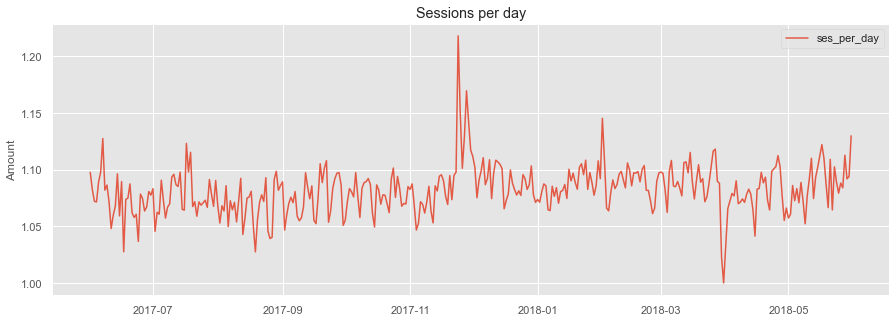

In [537]:
grouped_sessions.plot(y='ses_per_day', x='session_date', alpha=0.9, figsize=(15, 5))

plt.title('Sessions per day')
plt.xlabel('')
plt.ylabel('Amount')
plt.show()

Среднее количество сессий - одна:

In [538]:
grouped_sessions['ses_per_day'].mean()

1.0821696440039723

<b> Вывод </b>

В среднем пользователи совершают 1 посещение сайта в день.

Для сценария зашел-посмотрел-купил - это нормальная цифра.

### Время на сайте
Исследуем время, которое пользователи проводят на сайте


In [539]:
visits['session_duration'] = visits['session_duration'].dt.seconds

In [540]:
visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12-01,2017-12-21,2017-12-27,0


In [541]:
visits_desktop = visits.query('device == "desktop"').copy()
visits_desktop['session_duration'] = visits_desktop['session_duration']/60
visits_desktop['session_duration'].describe()

count    262567.000000
mean         11.732450
std          18.192427
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max        1408.000000
Name: session_duration, dtype: float64

In [542]:
visits_touch = visits.query('device == "touch"').copy()
visits_touch['session_duration'] = visits_touch['session_duration']/60
visits_touch['session_duration'].describe()

count    96833.000000
mean         7.993657
std         12.542192
min          0.000000
25%          1.000000
50%          3.000000
75%         10.000000
max        514.000000
Name: session_duration, dtype: float64

In [543]:
visits['session_duration'] = visits['session_duration']/60

In [544]:
visits['session_duration'].mean()

10.725108143202156

In [545]:
visits['session_duration'].mode()

0    1.0
dtype: float64

array([[<AxesSubplot:title={'center':'session_duration'}>]], dtype=object)

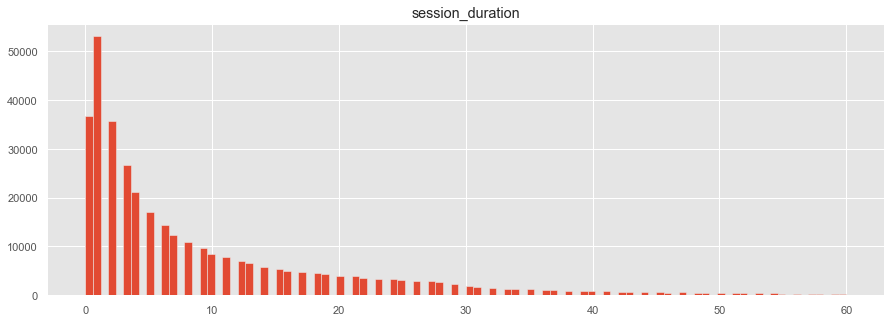

In [546]:
visits.hist('session_duration', bins = 100, range = (0, 60), figsize=(15, 5))

<b> Вывод </b>

Наиболее часто пользователи проводят на сайте 1 минуту.

Возможно, они заходят целенаправленно, поэтому укладываются в одну минуту. 
Лучше, конечно, когда задерживаются на более долгое время.

### Retention rate - коэффициент удержания

Отражает, сколько пользователей из когорты относительно их изначального числа вернулось в последующие периоды.

Найдем дату, когда пользователь впервые посетил сайт:

In [547]:
first_visit_date = visits.groupby('uid')['start_ts'].min()
first_visit_date.name = 'first_visit_date'

user_activity = visits.merge(first_visit_date, on='uid')
user_activity.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration,first_visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,18.0,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,28.0,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,24.0,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,28.0,2018-03-09 20:05:00


Выделим из столбцов first_visit_date и start_ts месяцы. 
Преобразуем значения столбцов к типу datetime64[M]

In [548]:
user_activity['start_ts'] = user_activity['start_ts'].astype(
    'datetime64[M]'
) 

user_activity['first_visit_month'] = user_activity['first_visit_date'].astype(
    'datetime64[M]'
) 

In [549]:
user_activity.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration,first_visit_date,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-01,16879256277535980062,2017,2017-12-01,2017-12-14,2017-12-20,18.0,2017-12-20 17:20:00,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-01,104060357244891740,2018,2018-02-01,2018-02-15,2018-02-19,28.0,2018-02-19 16:53:00,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01,7459035603376831527,2017,2017-07-01,2017-06-29,2017-07-01,0.0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-01,16174680259334210214,2018,2018-05-01,2018-05-17,2018-05-20,24.0,2018-03-09 20:05:00,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-01,16174680259334210214,2018,2018-03-01,2018-03-08,2018-03-09,28.0,2018-03-09 20:05:00,2018-03-01


In [550]:
user_activity['lifetime'] = (user_activity['start_ts'] - 
                            user_activity['first_visit_month'])/np.timedelta64(1, 'M')

user_activity['lifetime'] = user_activity['lifetime'].round().astype('int')


Сгруппируем данные по когорте и lifetime.

Посчитаем для каждой когорты количество активных пользователей на определенный месяц жизни.

In [551]:
cohorts = (user_activity.groupby(['first_visit_month','lifetime'])
          .agg({'uid':'nunique'}).reset_index()
          )

cohorts.head()

,first_visit_month,lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Найдем исходное число пользователей в когорте - возьмем их число на нулевую неделю.

In [552]:
initial_users_count = cohorts[cohorts['lifetime'] == 0][
    ['first_visit_month', 'uid']
]

initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

initial_users_count.head()

,first_visit_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Объединим таблицы:

In [553]:
cohorts = cohorts.merge(initial_users_count, on='first_visit_month')
cohorts.head()

,first_visit_month,lifetime,uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


Рассчитаем Retention Rate:

In [554]:
cohorts['retention'] = cohorts['uid']/cohorts['cohort_users']
cohorts['first_visit_month'] = cohorts['first_visit_month'].dt.strftime('%Y-%m')
cohorts.head()

,first_visit_month,lifetime,uid,cohort_users,retention
0,2017-06,0,13259,13259,1.000000
1,2017-06,1,1043,13259,0.078664
2,2017-06,2,713,13259,0.053775
3,2017-06,3,814,13259,0.061392
4,2017-06,4,909,13259,0.068557


Построим сводную таблицу и создадим тепловую карту

In [555]:
retention_pivot = cohorts.pivot_table(
    index='first_visit_month',
    columns='lifetime',
    values='retention',
    aggfunc='sum',
)
retention_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02,1.0,0.05708,0.025454,0.020093,,,,,,,,


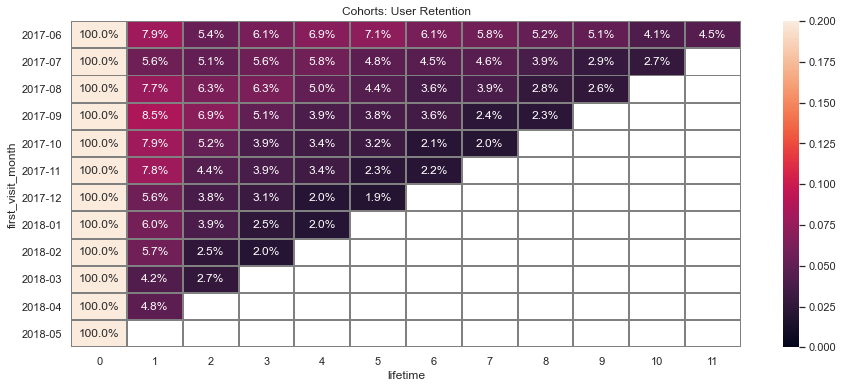

In [556]:
sns.set(style='white')
plt.figure(figsize=(15, 6))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot,
            annot=True,
            fmt='.1%',
            linewidths=1,
            linecolor='gray',
            vmin = 0, vmax= 0.2);

In [557]:
retention_pivot.mean(axis=0)

lifetime
0     1.000000
1     0.065167
2     0.046333
3     0.042760
4     0.040595
5     0.039444
6     0.036957
7     0.037509
8     0.035465
9     0.035159
10    0.034062
11    0.044951
dtype: float64

<b> Вывод: </b>

На второй месяц жизни когорт retention rate составляет 6,5% - большой процент пользователей не продолжает пользоваться сервисом.

## Метрики электронной коммерции

### Первое посещение - совершение покупки
Узнаем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки. 

Найдем дату первого заказа

In [558]:
first_order_date = orders.groupby('uid')['buy_ts'].min().reset_index()
first_order_date.columns = ['uid', 'first_order']

Дата первого действия:

In [559]:
first_action_date = visits.groupby('uid')['start_ts'].min().reset_index()
first_action_date.columns = ['uid','first_action']

Объединим таблицы

In [560]:
order_visit = first_order_date.merge(first_action_date, on='uid')
order_visit.head()

,uid,first_order,first_action
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Переведем столбцы в формат даты:

In [561]:
order_visit['first_order'] = pd.to_datetime(order_visit['first_order'])
order_visit['first_action'] = pd.to_datetime(order_visit['first_action'])

Найдем разницу между первым заказом и первым действием:

In [562]:
order_visit['dif'] = ((order_visit['first_order'] - order_visit['first_action'])/np.timedelta64(1,'D')).round().astype('int')
order_visit.head()

,uid,first_order,first_action,dif
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,107
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,1
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


In [563]:
order_visit['dif'].describe()

count    36523.000000
mean        16.893656
std         47.075936
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max        363.000000
Name: dif, dtype: float64

In [564]:
order_visit['dif'].mode()

0    0
dtype: int64

<AxesSubplot:>

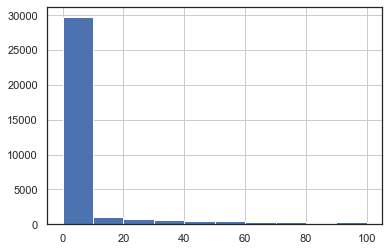

In [565]:
order_visit['dif'].hist(bins = 10, range = (0, 100))

<b> Вывод </b>

Чаще всего заказ оформляют в тот же день.
Среднее значение - 16 дней.

### Среднее кол-во покупок на покупателя

Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев. Изучать изменение этой метрики во времени необязательно;

In [566]:
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [567]:
first_order = orders.groupby('uid')['buy_ts'].min()
first_order.name = 'first_order'

orders = orders.merge(first_order, on='uid')

orders['first_order'] = orders['first_order'].astype(
    'datetime64[M]'
)
orders['buy_ts'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,first_order
0,2017-06-01,17.00,10329302124590727494,2017-06-01
1,2017-06-01,0.55,11627257723692907447,2017-06-01
2,2017-06-01,0.37,17903680561304213844,2017-06-01
3,2017-06-01,0.55,16109239769442553005,2017-06-01
4,2017-06-01,0.37,14200605875248379450,2017-06-01


Определим lifetime пользователей

In [568]:
orders['cohort_lifetime'] = orders['buy_ts'] - orders['first_order']
orders['cohort_lifetime']= orders['cohort_lifetime']/ np.timedelta64(1, 'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype('int')

Сформируем когорты:

In [569]:
cohort = (orders.groupby(['first_order', 'cohort_lifetime'])
    .agg({'uid':'nunique', 'buy_ts':'count'})).reset_index()
cohort.head()

,first_order,cohort_lifetime,uid,buy_ts
0,2017-06-01,0,2023,2354
1,2017-06-01,1,61,177
2,2017-06-01,2,50,174
3,2017-06-01,3,54,226
4,2017-06-01,4,88,292


Найдем среднее количесвто покупок на одного пользователя:

In [570]:
cohort['avg_order'] = cohort['buy_ts']/cohort['uid']
cohort.head()

,first_order,cohort_lifetime,uid,buy_ts,avg_order
0,2017-06-01,0,2023,2354,1.163618
1,2017-06-01,1,61,177,2.901639
2,2017-06-01,2,50,174,3.480000
3,2017-06-01,3,54,226,4.185185
4,2017-06-01,4,88,292,3.318182


Построим сводную таблицу:

In [571]:
cohort_pivot = cohort.pivot_table(
    index = 'first_order',
    columns = 'cohort_lifetime',
    values = 'avg_order',
    aggfunc = 'mean'
).round(2)

cohort_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06-01,1.16,2.9,3.48,4.19,3.32,3.25,4.45,3.7,3.66,3.4,2.13,1.62
2017-07-01,1.14,1.92,2.11,1.62,1.47,2.16,1.69,1.28,1.38,1.09,2.04,
2017-08-01,1.12,1.86,1.89,1.84,2.12,1.94,1.63,1.77,2.42,1.48,,
2017-09-01,1.14,1.68,1.61,2.22,1.29,1.7,1.64,1.51,1.42,,,
2017-10-01,1.14,1.52,1.32,1.33,1.39,1.43,1.54,1.87,,,,
2017-11-01,1.18,1.79,1.52,1.99,1.68,1.23,1.65,,,,,
2017-12-01,1.15,1.85,1.96,1.85,1.72,1.67,,,,,,
2018-01-01,1.12,1.96,1.92,1.49,1.73,,,,,,,
2018-02-01,1.12,1.88,1.43,1.79,,,,,,,,


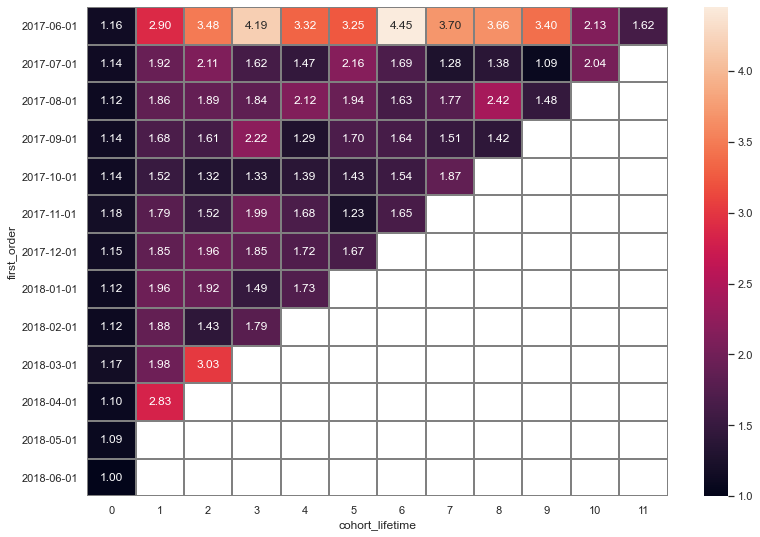

In [572]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('')
sns.heatmap(cohort_pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', yticklabels = cohort_pivot.index.astype('str'));

In [573]:
cohort_pivot.mean(axis = 0)

cohort_lifetime
0     1.125385
1     2.015455
2     2.027000
3     2.035556
4     1.840000
5     1.911429
6     2.100000
7     2.026000
8     2.220000
9     1.990000
10    2.085000
11    1.620000
dtype: float64

<b> Вывод </b>

В среднем покупатели совершают две покупки за 6 месяцев.

### Средний чек

Рассчитаем средний чек и построим график, отражающий изменения метрики во времени

In [574]:
orders.head()

,buy_ts,revenue,uid,first_order,cohort_lifetime
0,2017-06-01,17.00,10329302124590727494,2017-06-01,0
1,2017-06-01,0.55,11627257723692907447,2017-06-01,0
2,2017-06-01,0.37,17903680561304213844,2017-06-01,0
3,2017-06-01,0.55,16109239769442553005,2017-06-01,0
4,2017-06-01,0.37,14200605875248379450,2017-06-01,0


In [575]:
orders['buy_ts'] = orders['buy_ts'].astype('datetime64[M]')

In [576]:
avg_check2 = orders.pivot_table(
    index = 'buy_ts',
    values = 'revenue',
    aggfunc = 'mean'    
).reset_index()

avg_check2.head()

,buy_ts,revenue
0,2017-06-01,4.060106
1,2017-07-01,5.306589
2,2017-08-01,4.847139
3,2017-09-01,5.416448
4,2017-10-01,4.928280


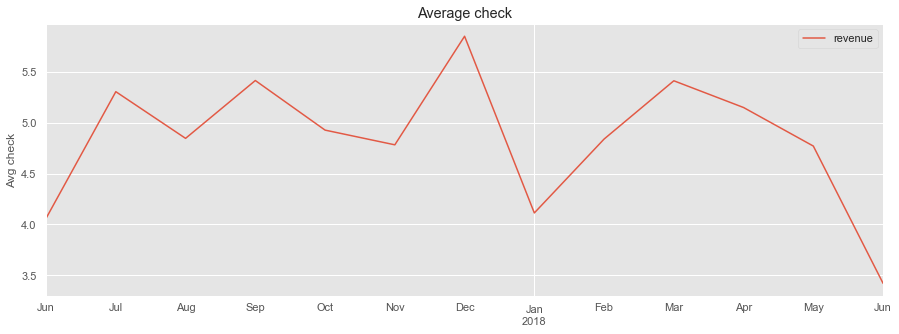

In [577]:
plt.style.use('ggplot')
avg_check2.plot(y='revenue', x='buy_ts', alpha=0.9, figsize=(15, 5))

plt.title('Average check')
plt.xlabel('')
plt.ylabel('Avg check')
plt.show()

In [578]:
avg_check2['revenue'].mean()

4.838699619166336

<b> Вывод </b>

Средний чек имееет пиковые значения в июле, сентябре, декабре и марте.

Средний чек - 4.8 у.е.

### LTV

Выясним, как меняется LTV на покупателя по когортам.
Маржинальность сервиса — 100%. 

In [579]:
orders.head()

,buy_ts,revenue,uid,first_order,cohort_lifetime
0,2017-06-01,17.00,10329302124590727494,2017-06-01,0
1,2017-06-01,0.55,11627257723692907447,2017-06-01,0
2,2017-06-01,0.37,17903680561304213844,2017-06-01,0
3,2017-06-01,0.55,16109239769442553005,2017-06-01,0
4,2017-06-01,0.37,14200605875248379450,2017-06-01,0


Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [580]:
cohort_sizes = (
    orders.groupby('first_order')
    .agg({'uid': 'nunique'})
    .reset_index()
)
cohort_sizes.columns = ['first_order', 'n_buyers']
cohort_sizes.head()

,first_order,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку

In [581]:
cohorts = (
    orders.groupby(['first_order', 'buy_ts'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
cohorts.head()

,first_order,buy_ts,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


LTV - накопительная выручка когорты в пересчете на количество людей. 

Добавим в таблицу cohorts информацию о том, сколько людей первый раз совершили покупку в каждый месяц.

In [582]:
report = pd.merge(cohort_sizes, cohorts, on='first_order')

report.head()

,first_order,n_buyers,buy_ts,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


LTV считают из валовой прибыли.
Так как маржинальность 100% - валовая прибыль равна выручке.

Определим lifetime когорт:

In [583]:
report['age'] = ((report['buy_ts'] - report['first_order'])/ np.timedelta64(1, 'M'))
report['age'] = report['age'].round().astype('int')
report.head()

,first_order,n_buyers,buy_ts,revenue,age
0,2017-06-01,2023,2017-06-01,9557.49,0
1,2017-06-01,2023,2017-07-01,981.82,1
2,2017-06-01,2023,2017-08-01,885.34,2
3,2017-06-01,2023,2017-09-01,1931.30,3
4,2017-06-01,2023,2017-10-01,2068.58,4


Найдем LTV - разделим валовую прибыль когорт за каждый месяц на общее число пользователей в каждой когорте.

In [584]:
report['ltv'] = report['revenue'] / report['n_buyers']
report.head()

,first_order,n_buyers,buy_ts,revenue,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531


In [585]:
output = report.pivot_table(
    index='first_order',
    columns='age',
    values='ltv',
    aggfunc='mean'
).round(2).cumsum(axis=1)


output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5.0,5.93,7.0,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


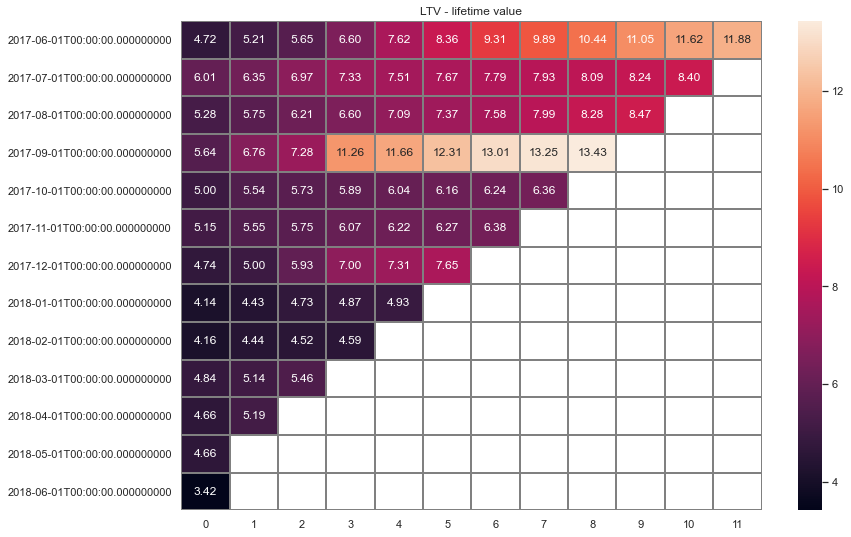

In [586]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('LTV - lifetime value')
sns.heatmap(output, annot=True, fmt='.2f', linewidths=1, linecolor='gray');


plt.xlabel('')
plt.ylabel('')
plt.show()

In [587]:
output.mean(axis = 1)

first_order
2017-06-01     8.529167
2017-07-01     7.480909
2017-08-01     7.062000
2017-09-01    10.511111
2017-10-01     5.870000
2017-11-01     5.912857
2017-12-01     6.271667
2018-01-01     4.620000
2018-02-01     4.427500
2018-03-01     5.146667
2018-04-01     4.925000
2018-05-01     4.660000
2018-06-01     3.420000
dtype: float64

<b> Вывод </b>

В первые 6 месяцев пользователи в среднем приносят 5.9 у.е.

## Маркетинговые метрики


### Общая сумма расходов на маркетинг

Посчитаем общую сумму раходов на маркетинг:

In [588]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Сумма расходов на маркетинг по месяцам:

In [589]:
costs['dt'] = costs['dt'].astype('datetime64[M]')

In [590]:
costs_per_month = costs.pivot_table(
    index = 'dt',
    values = 'costs',
    aggfunc = 'sum'
).reset_index()

costs_per_month.head()

,dt,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


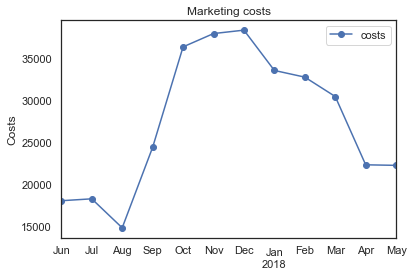

In [591]:
costs_per_month.plot(y='costs', x='dt', style='o-')

plt.title('Marketing costs')
plt.xlabel('')
plt.ylabel('Costs')
plt.show()

<b> Вывод: </b>

Маркетинговые расходы увеличиваются в период с октября по декабрь, далее постепенно снижаются.
Минимальных значений достигают летом.

### Распределение маркетинговых расходов по источникам

In [592]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-01,62.25
2,1,2017-06-01,36.53
3,1,2017-06-01,55.00
4,1,2017-06-01,57.08


In [593]:
costs['month'] = costs['dt'].astype('datetime64[M]')
costs_month = costs.groupby(['month','source_id'])[['costs']].sum().reset_index()

In [594]:
costs_grouped_months = costs.pivot_table(
    index = 'source_id',
    columns = 'dt',
    values = 'costs',
    aggfunc = 'sum'
)

costs_grouped_months

dt,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86


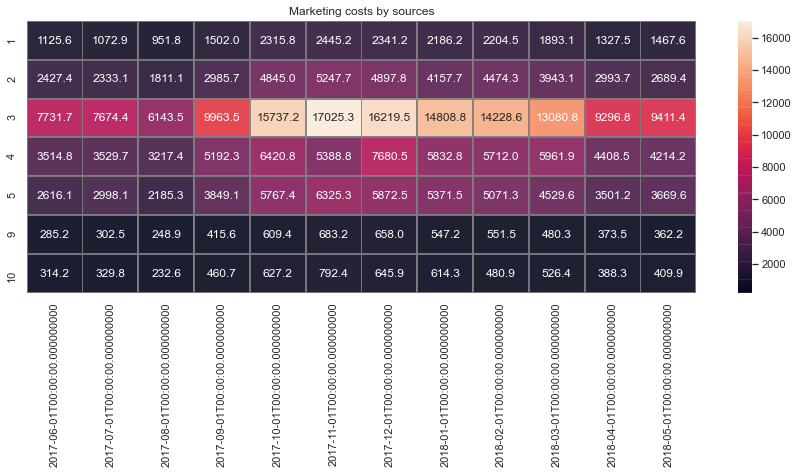

In [595]:
plt.figure(figsize=(15, 5))
plt.title('')
sns.heatmap(costs_grouped_months,
            annot=True,
            fmt='.1f',
            linewidths=1,
            linecolor='gray',
            alpha = 0.9)

plt.title('Marketing costs by sources')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [596]:
costs_month.groupby('source_id').agg({'costs':'sum'})

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


<b> Вывод </b>

Расходы на маркетинг меньше всего с июля по август.
Максимальные расходы были в октябре-декабре, после чего снова пошли на спад.

Больше всего расходов приходится на источник трафика с id = 3.
Меньше всего расходов на 9 и 10 источники трафика.

### CAC - customer acquisition cost
Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика. 

Найдем уникальное число привлеченных пользователей по месяцам:

In [597]:
buyers_by_month=orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
buyers_by_month.columns = ['uid', 'first_order_ts']
buyers_by_month['first_order_dt'] = buyers_by_month['first_order_ts'].dt.date
buyers_by_month['first_order_month'] = buyers_by_month['first_order_ts'].astype('datetime64[M]')


Найдем сумму маркетинговых расходов по месяцам:

In [598]:
costs['dt'] = costs['dt'].astype('datetime64[M]')
costs_by_month = costs.groupby('dt').agg({'costs':'sum'}).reset_index()
costs_by_month.head()

,dt,costs
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88


Объединим таблицы с количеством новых покупателей и суммой затрат по месяцам:

In [599]:
costs_buyers_period = pd.merge(buyers_by_month.groupby('first_order_month').agg({'uid': 'nunique'}), 
                               costs_by_month.groupby('dt').agg({'costs': 'sum'}), 
                               left_index=True, 
                               right_index=True)
costs_buyers_period['cac'] = costs_buyers_period['costs']/costs_buyers_period['uid']

costs_buyers_period.head()

,uid,costs,cac
2017-06-01,2023,18015.00,8.905091
2017-07-01,1923,18240.59,9.485486
2017-08-01,1370,14790.54,10.796015
2017-09-01,2581,24368.91,9.441654
2017-10-01,4340,36322.88,8.369327


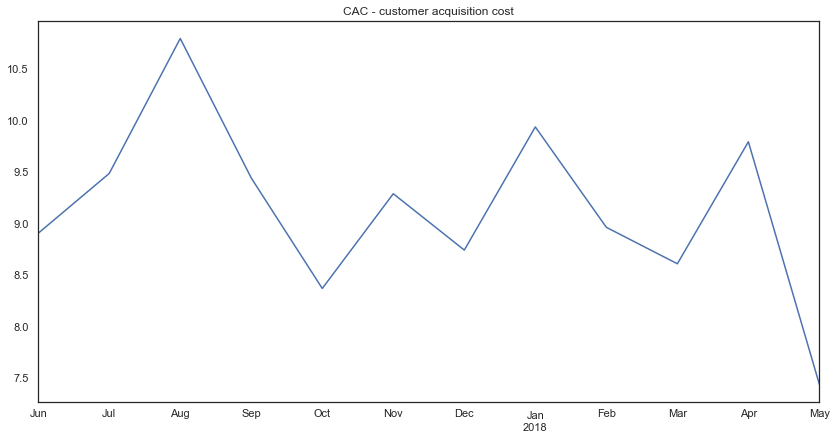

In [600]:
costs_buyers_period['cac'].plot(figsize=(14,7), title='CAC - customer acquisition cost')


plt.show()

In [601]:
costs_buyers_period['cac'].describe()

count    12.000000
mean      9.147357
std       0.855737
min       7.437841
25%       8.708584
50%       9.125814
75%       9.562421
max      10.796015
Name: cac, dtype: float64

<b>Найдем средний САС для каждого источника трафика.</b>

In [602]:
visits = visits.sort_values(by = 'start_ts')
first_source = (visits.groupby('uid').agg({'source_id':'first'}).reset_index())
 
 
visits_and_orders = first_source.merge(orders, on = 'uid')
 
 
unique_users = visits_and_orders.groupby(
    ['first_order', 'source_id']).agg({'uid':'nunique'}).reset_index()
 
 
 
revenue_sum = visits_and_orders.groupby(
    ['first_order', 'buy_ts', 'source_id']).agg({'revenue':'sum'}).reset_index()
 
all_together = unique_users.merge(revenue_sum, on = ['first_order', 'source_id'])
all_together['ltv'] = all_together['revenue']/all_together['uid']
 
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs_grouped = costs.groupby(['source_id', 'costs_month']).agg({'costs':'sum'}).reset_index()
 
report = all_together.merge(costs, left_on = ['source_id', 'first_order'],
                                           right_on = ['source_id', 'costs_month'])
 
report['cac'] = report['costs']/report['uid']
report['romi'] = report['ltv']/report['cac']
 
report.head()

,first_order,source_id,uid,buy_ts,revenue,ltv,dt,costs,month,costs_month,cac,romi
0,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,75.20,2017-06-01,2017-06-01,0.395789,18.333777
1,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,62.25,2017-06-01,2017-06-01,0.327632,22.147791
2,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,36.53,2017-06-01,2017-06-01,0.192263,37.741582
3,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,55.00,2017-06-01,2017-06-01,0.289474,25.067273
4,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,57.08,2017-06-01,2017-06-01,0.300421,24.153819


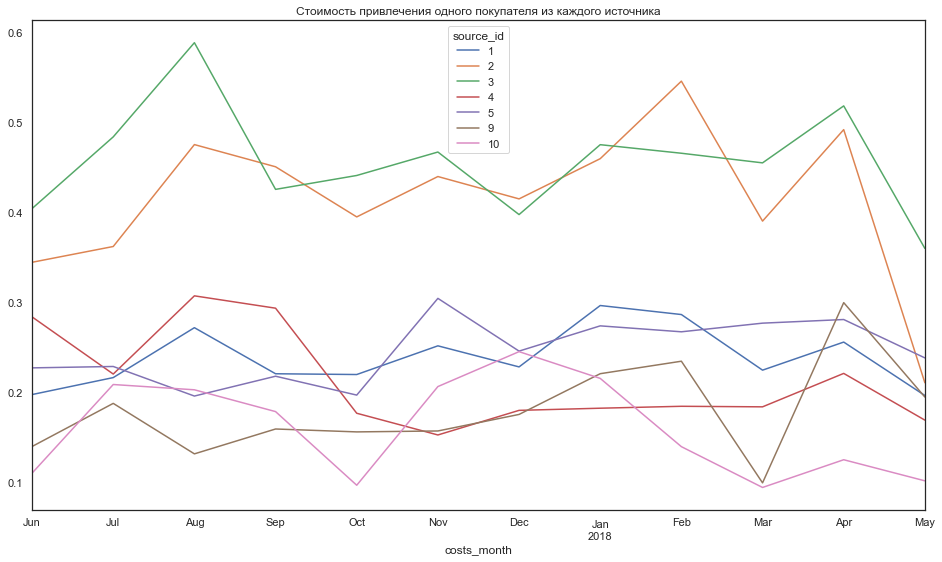

In [603]:
report.pivot_table(index='costs_month', columns='source_id', values='cac', aggfunc='mean').plot(
    figsize=(16,9), title='Стоимость привлечения одного покупателя из каждого источника')
plt.show()

Вывод:
    
- Наибольшая стоимость привлечения покупателей у 2 и 3-го источника трафика.
- Средняя - у 1, 4 и 5
- Наименьшая у 9 и 10 источника


### ROMI - окупаемость маркетинга

- Рассчитаем ROMI по когортам в разрезе источников.

- Сравним окупаемость за одинаковые периоды жизни когорт.

- Построим графики, отражающие изменения метрик во времени.

In [604]:
report.head()

,first_order,source_id,uid,buy_ts,revenue,ltv,dt,costs,month,costs_month,cac,romi
0,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,75.20,2017-06-01,2017-06-01,0.395789,18.333777
1,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,62.25,2017-06-01,2017-06-01,0.327632,22.147791
2,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,36.53,2017-06-01,2017-06-01,0.192263,37.741582
3,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,55.00,2017-06-01,2017-06-01,0.289474,25.067273
4,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,57.08,2017-06-01,2017-06-01,0.300421,24.153819


In [606]:
report['age'] = ((report['buy_ts'] - report['first_order'])/ np.timedelta64(1, 'M'))
report['age'] = report['age'].round().astype('int')

report.head()

,first_order,source_id,uid,buy_ts,revenue,ltv,dt,costs,month,costs_month,cac,romi,age
0,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,75.20,2017-06-01,2017-06-01,0.395789,18.333777,0
1,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,62.25,2017-06-01,2017-06-01,0.327632,22.147791,0
2,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,36.53,2017-06-01,2017-06-01,0.192263,37.741582,0
3,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,55.00,2017-06-01,2017-06-01,0.289474,25.067273,0
4,2017-06-01,1,190,2017-06-01,1378.7,7.256316,2017-06-01,57.08,2017-06-01,2017-06-01,0.300421,24.153819,0


In [609]:
ltv_source = report.pivot_table(
    index='source_id', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').cumsum().round(2)

ltv_source.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
source_id,,,,,,,,,,,,
1,6.32,1.05,1.17,1.11,0.81,0.57,0.67,1.29,1.48,1.14,1.06,1.67
2,12.84,2.70,2.86,2.95,1.84,1.40,1.59,1.89,1.98,1.48,1.92,2.1
3,17.45,3.02,3.04,3.10,1.96,1.49,1.66,1.97,2.06,1.53,1.96,2.14
4,22.12,3.22,3.16,3.31,2.18,1.80,2.18,2.13,2.18,1.86,2.59,2.22
5,26.96,3.53,3.45,5.31,2.54,2.25,2.49,2.38,2.40,2.26,2.71,2.34
9,30.96,3.84,3.82,5.67,2.76,2.45,2.75,2.61,2.89,2.36,2.79,
10,34.24,3.92,3.90,5.80,2.81,2.49,2.79,2.67,2.90,2.45,,


In [ ]:
def pivot(report_source, id):
    return report_source.query("source_id == " + id)\
        .pivot_table(index='first_order', columns='age', values='romi', aggfunc='mean')\
        .cumsum(axis=1)


def draw_romi(romi, title):
    sns.set(style='white')
    plt.figure(figsize=(15, 3))
    plt.title(title)
    sns.heatmap(romi, 
                annot=True, 
                fmt='.2f', 
                linewidths=1, 
                linecolor='gray')

def pivot_and_draw_romi(report_source, id, title):
    romi = pivot(report_source, id)
    draw_romi(romi, title)

pivot_and_draw_romi(report_source, '1', "ROMI 1")
pivot_and_draw_romi(report_source, '2', "ROMI 2")
pivot_and_draw_romi(report_source, '3', "ROMI 3")
pivot_and_draw_romi(report_source, '4', "ROMI 4")
pivot_and_draw_romi(report_source, '5', "ROMI 5")
pivot_and_draw_romi(report_source, '9', "ROMI 9")
pivot_and_draw_romi(report_source, '10', "ROMI 10")


- Хуже всего окупается 3-ий источник трафика. При том, что на него расходуется значительная часть бюджета.

- Следует обратить внимание на 4 источник трафика  - когорты имеют лучшую окупаемость.

- Понять, почему снижается ROMI у первого источника. 

## Вывод по проекту


Количество пользователей в день значительно не изменяется. Бывают резки всплески - например, перед Новым годом - может быть свзано с семейными посещениями мероприятий.

В течение года пользователи наименее активны  в июне, июле и августе. Наиболее активны в ноябре и декабре. Недельная активность больше привязана к месяцу.

Среднее количество сессий в день - одна, наиболее часто проводят на сайте одну минуту.

На второй месяц жизни когорт retention rate составляет 6,5% - большой процент пользователей не продолжает пользоваться сервисом.

Чаще всего заказ оформляют в тот же день, но иногда доходит и до 17 дней.
В среднем один покупатель совершает одну покупку в месяц.

Средний чек имееет пиковые значения в сентябре и декабре. В динамике наблюдаем уменьшение среднего чека.
В первые 6 месяцев средний LVT достигает значения 40 у.е.

Маркетинговые расходы увеличиваются в период с октября по декабрь.
Количество расходов по источникам трафика:
- 3 - 141 321
- 4 - 61 073
- 5 - 51 757
- 2 - 42 806
- 1 - 20 833
- 10 - 5 822
- 9 - 5 517

В среднем привлечение одного пользователя (CAC) обходится в 9 у.е.
В первые 6 месяцев пользователь приносит в среднем 5.9 у.е.

Наибольшая стоимость привлечения у 3-го источника трафика.
Минимальная стоимость привлечения у 9 и 10 источников.

Рекомендации:
- Хуже всего окупается 3-ий источник трафика. При том, что на него расходуется значительная часть бюджета. Необходимо перераспределение бюджета.
- Следует обратить внимание на 4 источник трафика - когорты имеют лучшую окупаемость.
- Нужно понять, почему снижается ROMI у первого источника.
